# 🔷 Sobre a aula

Meu intuito com essa aula é passar o que aprendi no curso da alura sobre estatistica com python. Essa aula servirá para você fazer análise descritiva de um dataset.

 <br>

# 🔷 Informações sobre o dataset

## 🔶 Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

 <br>

## 🔶 Variáveis utilizadas


### <font color='red'>Renda</font>

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.<br>


### <font color='red'>Idade</font>

Idade do morador na data de referência em anos.


### <font color='red'>Altura (elaboração própria)</font>

Altura do morador em metros.


### <font color='red'>UF</font>

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|


### <font color='red'>Sexo</font>

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|


### <font color='red'>Anos de Estudo</font>

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|


### <font color='red'>Cor</font>

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|


### <font color='orange'>Observação</font>

> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

 
 <br>
 

# 🔷 Bibliotecas que utilizaremos


In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import scipy as scp
import random as rd

<br>

# 🔷 Importando a base de dados

In [3]:
# Vamos importar um arquivo CSV e para isso vamo utilizar o método read_csv que o pandas oferece

df = pd.read_csv('base-de-dados/dados.csv') # É necessário passar para ao método a localização do arquivo 
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


<br>

# 🔷 Tipos de dados

## 🔶 Variáveis qualitativas ordinais

São variáveis que representam uma qualidade ou atributo de algo e podem ser ordenadas.

In [3]:
# Anos de estudo é uma variável qualitativa ordinal
# Vamos selecionar a coluna 'Anos de estudo', pegar os valores unicos e coloca-los em ordem crescente

sorted(df['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

 <br>  

## 🔶 Variáveis qualitativas nominais

São variáveis que representam um atributo ou uma qualidade de algo e não podem ser ordenadas.

In [4]:
# Sexo é uma variável qualitativa nominal

df['Sexo'].unique()

array([0, 1])

In [5]:
# UF de estudo é uma variável qualitativa nominal

df['UF'].unique()

array([11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31,
       32, 33, 35, 41, 42, 43, 50, 51, 52, 53])

In [6]:
# Cor de estudo é uma variável qualitativa nominal

df['Cor'].unique()

array([8, 2, 4, 6, 0])

 <br>

## 🔶 Variáveis quantitativas discretas

As variáveis quantitativas discretas representam numeros inteiros, dados extraidos a partir da contagem. 

In [7]:
# Outra forma de selecionar uma coluna de um dataframe

df.Idade

0        23
1        23
2        35
3        46
4        47
         ..
76835    46
76836    30
76837    32
76838    57
76839    38
Name: Idade, Length: 76840, dtype: int64

In [8]:
# Min e max da coluna Idade

print(f'Idade minima {df.Idade.min()}')
print(f'Idade maxima {df.Idade.max()}')

Idade minima 13
Idade maxima 99



### <font color='orange'>Observação<font>
    
A variável _**idade**_ pode ser classificada de três formas distintas:

- **1.Quantitativa discreta**: quando representa números completos.
- **2.Quantitativa continua**: quando representa a idade exata, sendo representada por frações de anos.
- **3.Qualitativa ordinal**: quando representa faixas de idade.
    

 <br>

## 🔶 Variáveis quantitativas continuas

Variáveis que representam a mensuração de algo, valores com casas decimais.

In [9]:
df['Altura']

0        1.603808
1        1.739790
2        1.760444
3        1.783158
4        1.690631
           ...   
76835    1.687030
76836    1.792934
76837    1.830587
76838    1.726344
76839    1.658305
Name: Altura, Length: 76840, dtype: float64

In [10]:
# Min e max da coluna Altura

print(f'Altura minima {df["Altura"].min():.1f}')
print(f'Altura maxima {df["Altura"].max():.1f}')

Altura minima 1.3
Altura maxima 2.0


# 🔷 Distribuição de frequência

O primeiro passo em um trabalho de análise é descobri o comportamento das variáveis envolvidas estudo. Utilizando técnicas estatísticas como as análises das **DISTRIBUIÇÕES DE FREQUÊNCIAS** e **HISTOGRAMAS**. Devido a isso podemos avaliar melhor a forma como os fenômenos em estudo se distribuem.

## 🔶 Distribuição de frequência para variáveis qualitativas

Vamos criar uma função para podermos visualisar uma tabela bem organizada que mostre a frequência absoluta e a frequência relativa para cada variável do nosso dataset.

**FREQUÊNCIA ABSOLUTA**: É a quantidade de vezes que cada valor de uma variável se repete.<br>
**FREQUENCIA RELATIVA**: É a frequência absoluta expressa em porcentagem.

In [66]:
def tabela(coluna, indice):
    # coluna: deve ser uma coluna do dataset que corresponda a uma variável qualitativa
    # indice: deve ser um dicionário especificando com o código e o valor que esse código representa
    
    # Importando a lib pandas para que essa função funcione em qualquer arquivo.py ou ipynb
    import pandas as pd
    
    # Descobrindo a frequencia absoluta e relativa de cada valor da coluna
    freq_absoluta = coluna.value_counts()
    freq_relativa = round(coluna.value_counts(normalize=True) * 100, 2)
    
    # Vamos criar um dataframe para uma melhor visualisação dessas informações
    df = pd.DataFrame({'Freq_absoluta':freq_absoluta, 'Freq_relativa  (%)':freq_relativa})
    
    # Trocando o indice label das linhas 
    df.rename(index=indice, inplace=True)
    
    # Atribuindo um nome para a coluna de índice das linhas
    df.rename_axis(coluna.name, axis='columns', inplace=True)
    
    return df

 <br>

Vamos ver as frequências da coluna 'Sexo' do nosso dataset

In [12]:
tabela(coluna=df['Sexo'], indice={0: 'Masculino', 1:'Feminino'})

Sexo,Freq_absoluta,Freq_relativa (%)
Masculino,53250,69.3
Feminino,23590,30.7


 <br>

Vamos ver as frequências da coluna 'Cor' do nosso dataset

In [13]:
tabela(coluna=df['Cor'], indice={0: 'Indigena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda', 9:'Sem declaração'})

Cor,Freq_absoluta,Freq_relativa (%)
Parda,35925,46.75
Branca,31815,41.40
Preta,8391,10.92
Indigena,357,0.46
Amarela,352,0.46


 <br>

## 🔶 Cruzando os dados

Agora vamos aprender a fazer um cruzamento entre dados usando a função **crosstab** do pandas. Em um primeiro momento vamos descobrir a frequência absoluta, frequência relativa, renda média e idade média separando os dados em grupos de acordo com sexo e cor.

In [65]:
# Vamos criar o nosso dataframe com as frequências absolutas ou relativas de cada grupo de acordo com seu sexo e cor
print('\nQual tipo de informação você deseja ver?')
print('''
[0] frequência absoluta 
[1] frequência relativa
[2] renda média
[3] idade média''')

tipo_info = input('\nResposta: ')


freq_tipo = False
func = None
val = None


if tipo_info == '1':
    freq_tipo = True
elif tipo_info == '2':
    func = 'mean'
    val = df['Renda']
elif tipo_info == '3':
    func = 'mean'
    val = df['Idade']
    

df_info = pd.crosstab(index= df['Cor'], columns= df['Sexo'], normalize= freq_tipo, aggfunc= func, values= val)

if tipo_info == '1':
    df_info = df_info*100

# Vamos renomear os indices das linhas e das colunas para ficar visivelmente mais agradável
df_info.rename(index={0: 'Indigena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda', 9:'Sem declaração'},
          columns={0: 'Masculino', 1:'Feminino'},
          inplace=True)

# Retirando o rótulo dos eixos do dataframe
df_info.rename_axis(None, axis='columns', inplace=True)
df_info.rename_axis(None, axis='rows', inplace=True)

# Mostrando o dataframe 
round(df_info, 3)


Qual tipo de informação você deseja ver?

[0] frequência absoluta 
[1] frequência relativa
[2] renda média
[3] idade média

Resposta: 3


,Masculino,Feminino
Indigena,42.242,44.564
Branca,45.108,44.880
Preta,43.162,43.955
Amarela,47.055,44.607
Parda,43.291,43.498


 <br>

## 🔶 Distribuição de frequência para variáveis quantitativas

Podemos calcular a frequência das variáveis quantitativas de 2 formas. Classificando elas ou não classificando elas.

### 🔺 Sem classificação

Para facilitar, vamos pegar a função **tabela** e modificá-la para poder calcular as frequências das variáveis quantitativas do nosso dataset.

In [83]:
def tabela(coluna):
    # coluna: deve ser uma coluna do dataset que corresponda a uma variável qualitativa
    
    # Importando a lib pandas para que essa função funcione em qualquer arquivo.py ou ipynb
    import pandas as pd
    
    # Descobrindo a frequencia absoluta e relativa de cada valor da coluna
    freq_absoluta = coluna.value_counts()
    freq_relativa = round(coluna.value_counts(normalize=True) * 100, 2)
    
    # Vamos criar um dataframe para uma melhor visualisação dessas informações
    df = pd.DataFrame({'Freq_absoluta':freq_absoluta, 'Freq_relativa  (%)':freq_relativa})
    
    # Atribuindo um nome para a coluna de índice das linhas
    df.rename_axis(coluna.name, axis='columns', inplace=True)
    
    return df

<br>

Vamos calcular as frequências da coluna 'Renda' do nosso dataset sem classificá-la.

In [84]:
tabela(df['Renda']).head() #O metodo head serve para visualisar as n primeiras linhas de um dataframe, o padrão é 5

Renda,Freq_absoluta,Freq_relativa (%)
788,6881,8.95
1500,4567,5.94
1200,4476,5.83
2000,4233,5.51
1000,4158,5.41


 <br>

Vamos calcular as frequências da coluna 'Idade' do nosso dataset sem classificá-la.

In [86]:
tabela(df['Idade']).head()

Idade,Freq_absoluta,Freq_relativa (%)
40,2263,2.95
45,2250,2.93
37,2235,2.91
43,2213,2.88
35,2206,2.87


 <br>

### 🔺 Classificando as variáveis quantitativas

Vamos pegar a coluna 'Renda' e classificá-la com base nas classes sociais.

<font color=orange> **Passo 1**<font>

Especificar os limites de cada classe. Usamero a seguinte classificação:

**A** >> Acima de 20 SM<br>
**C** >> De 10 a 20 SM<br>
**C** >> De 4 a 10 SM<br>
**D** >> De 2 a 4 SM<br>
**E** >> Até 2 SM<br>

Onde **SM** é o salário minino da época. No nosso caso **R$ 788,00** (**2015**)

**A** >> Acima de 15.760<br>
**C** >> De 7.880 a 15.760 SM<br>
**C** >> De 3.152 a 7.880 SM<br>
**D** >> De 1.576 a 3.152 SM<br>
**E** >> Até 1.576 SM<br>

<font color=orange> **Passo 2**<font>

Descobrir o valor máximo e minimo da nossa 'Renda'.

In [6]:
maximo = df['Renda'].max()
minimo = df['Renda'].min()

print(maximo)
print(minimo)

200000
0


 <br>

Criar uma lista com o minimo, o maximo e os limites de cada classe. E também vamos criar os labels do nosso dataframe.

In [7]:
limites = [0, 1576, 3152, 7880, 15760, 200000]
classes = ['E', 'D', 'C', 'B', 'A']

 <br> 

Vamos usar o método cut do pandas para criar essa classificação.

In [8]:
import pandas as pd
x = pd.cut(x= df['Renda'], # a coluna que desejamos classificar
       bins= limites,      # os limites que definem a classificação
       labels= classes,    # serve para indicar qual tipo de classe a pessoa se encaixa
       include_lowest= True  # por padrão esse método não contabiliza as linhas que tem o mesmo valor que o valor minimo    
      )                      # colocamos True para que o pandas passe a contabilizar essas linhas

 <br> 

Agora vamos calcular a frequência absoluta e relativa como ja fizemos antes.

In [9]:
# calculando a frequencia absoluta e relativa
freq_absoluta = x.value_counts()
freq_relativa = round(x.value_counts(normalize=True)*100,2)

# criando o dataframe para uma melhor visualização das informações
df_frequencias = pd.DataFrame({'Freq_absoluta':freq_absoluta, 'Freq_relativa  (%)':freq_relativa})

# adicionando um rotulo para a coluna de indices
df_frequencias.rename_axis('Classes', axis=1, inplace=True)

# ordenando o as colunas pelo indice
df_frequencias.sort_index(ascending=False)

Classes,Freq_absoluta,Freq_relativa (%)
A,608,0.79
B,2178,2.83
C,7599,9.89
D,16700,21.73
E,49755,64.75


### 🔺 Regra de Sturges

As vezes podemos encontrar variáveis quantitativas que não possuem uma classificação definida que nem no exemplo passado, aonde usamos as classes sociais. Por isso existe uma formula que nos ajuda a criarmos essas classificações, **a regra de sturges**.

Essa regra basicamente nos diz aproximadamente a quantidade de classes que devemos criar para ter um melhor entendimento dos dados. As classes devem ter uma aplitude fixa, ou seja, a razão de uma classe para outra deve ser igual.


# $$k = 1 + \frac {10}{3}\log_{10}n$$

Para aplicarmos essa regra ná prática precisaremos importar a lib numpy.

In [10]:
import numpy as np

In [15]:
# o n da formula seria a quantidade de valores que temos sobre uma variável, ou seja, a quantidade de linhas.
n = df.shape[0]

# construido o cálculo
k = 1 + (10/3) * np.log10(n)

k  

17.285291187298853

Como não é possivel criar 17,28 classes, iremos arredondar o numero para dar continuidade.

In [20]:
k = int(k.round(0))
k

17

Agora nós iremos fazer o que já fizemos anteriormente, vamos criar uma tabela que mostra a distribuição dos dados de acordo com as 17 classes.

In [47]:
# Criando a classificação
clas = pd.cut(
    x= df['Renda'], # a coluna que desejamos classificar
    bins= k,        # a quantidade de classes
    include_lowest= True  # por padrão esse método não contabiliza as linhas que tem o mesmo valor que o valor minimo    
                          # colocamos True para que o pandas passe a contabilizar essas linhas.  
)                     
        
# Calculando a frequencia absoluta e relativa
freq_absoluta = clas.value_counts(sort=False)
freq_relativa = (clas.value_counts(sort=False, normalize=True) * 100).round(3)

# Criando o dataframe para uma melhor visualização das informações
df_frequencias = pd.DataFrame({'Freq. absoluta':freq_absoluta, 'Freq. relativa (%)':freq_relativa})

# Adicionando um rotulo para a coluna de indices
df_frequencias.rename_axis('Faixa de renda', axis='columns', inplace= True)

# Mostrando o df
df_frequencias

Faixa de renda,Freq. absoluta,Freq. relativa (%)
"(-200.001, 11764.706]",75594,98.378
"(11764.706, 23529.412]",1022,1.330
"(23529.412, 35294.118]",169,0.220
"(35294.118, 47058.824]",19,0.025
"(47058.824, 58823.529]",16,0.021
"(58823.529, 70588.235]",5,0.007
"(70588.235, 82352.941]",4,0.005
"(82352.941, 94117.647]",1,0.001
"(94117.647, 105882.353]",6,0.008
"(105882.353, 117647.059]",0,0.000


## 🔶 Histograma


Um histograma é um gráfico que serve para representar uma distribuição de frequência. É um gráfico formado por um grupo de retângulos colocados lado a lado, onde a área de cada retângulo é proporcional à frequência da classe que ele representa.

Para criar um histograma no pytthon vamos importar a biblioteca **seaborn**.

In [4]:
import seaborn as sns

Vamos criar o histograma com base na coluna 'Altura' do nosso dataset.

Text(0, 0.5, 'Quantidade')

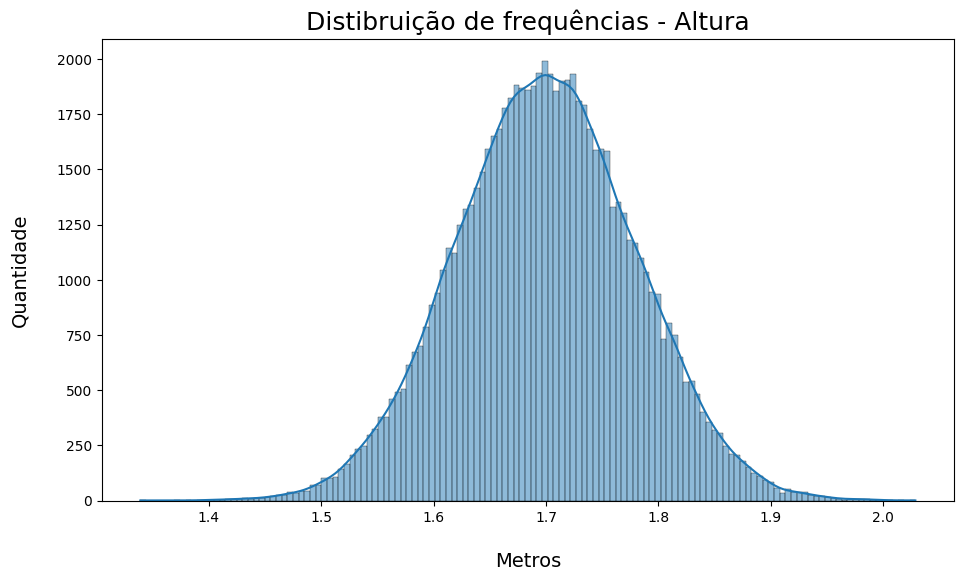

In [24]:
# criando o histograma
ax = sns.histplot(
    data=df['Altura'], # a coluna que usaremos
    kde=True           # serve para adicionar ao histograma uma linha de densidade
)

# configurando o tamanho do gráfico
ax.figure.set_size_inches(11, 6)

# adicionando um titulo para o gráfico
ax.set_title('Distibruição de frequências - Altura', fontsize=18)

# adicionando um nome para o eixo x e y
ax.set_xlabel('Metros', fontsize=14, labelpad=20)
ax.set_ylabel('Quantidade', fontsize=14, labelpad=20)

# 🔷 Medidas de têndencia central

## 🔶 Média aritmética

A média aritmética nada mais é que o somatório de todas as observações de uma determinada variável divido pela quantidade de observações feitas. Nem sempre a média vai representar bem um conjunto de dados, pois valores muito baixo ou muito alto pode influenciar o resultado da média, levandoa conclusões errôneas.

Vamos calcular a média da coluna 'Renda'.

In [87]:
print(f'A média é {df["Renda"].mean()}')

A média é 2000.3831988547631


Vamos calcular a 'Renda' média por 'Sexo'.

In [62]:
# Com o poderoso método groupby conseguimos separar os dados de acordo com o Sexo e calcular a Renda média de cada
# grupo.

renda_media_by_sexo = df.groupby(['Sexo'])[['Renda']].mean()

# renomenado os indices
renda_media_by_sexo.rename(index={0: 'Masculino', 1:'Feminino'}, inplace=True)
renda_media_by_sexo.rename(columns={'Renda': 'Renda média (R$)'}, inplace=True)

# renomenado o eixo
renda_media_by_sexo.rename_axis('', axis=0, inplace=True)
renda_media_by_sexo.rename_axis('Sexo', axis=1, inplace=True)

# mostrando o df
renda_media_by_sexo

Sexo,Renda média (R$)
,
Masculino,2192.441596
Feminino,1566.847393


## 🔶 Mediana

A mediana é um numero que divide o seu conjunto de dados em dois grupos, o 1° grupo é composto por 50% dos dados abaixo da mediana e o 2° grupo é composto por 50% dos dados acima da mediana.

Para calcular a mediana você precisa seguir esses passo:

### 1° passo
Organizar os dados em ordem crescente.<br>

### 2° passo
Identificar o número de observações (registros) do conjunto de dados ($n$)<br>

### 3° passo 
Quando $n$ for ímpar, a posição do elemento mediano será obtida da seguinte forma:
# $$Mediana = {nㅤ//ㅤ2}$$
<br>

Quando $n$ for par, a mediana será a média dos dois elementos centrais do conjunto:
# $$Mediana = \frac{elemento_1 + elemento_2}2$$


Segue um exemplo com um conjunto aonde $n$ é ímpar.

In [85]:
# conjunto de dados ímpar
dataset = [10, 12, 11, 9, 12, 14, 11, 13, 10]

# passo 1
dataset = sorted(dataset)

# passo 2
n = len(dataset)

# passo 3
posicao = n//2
mediana = dataset[posicao]

print(f'Dataset ordenado: {dataset}')
print(f'A mediana é {mediana}')

Dataset ordenado: [9, 10, 10, 11, 11, 12, 12, 13, 14]
A mediana é 11



Segue um exemplo com um conjunto aonde $n$ é par.

In [78]:
# conjunto de dados par
dataset = [10, 12, 11, 9, 12, 14, 11, 13]

# passo 1
dataset = sorted(dataset)


# passo 2
n = len(dataset)

# passo 3
elemento_1 =  idades[(n // 2) - 1]
elemento_2 =  idades[(n // 2)]
mediana = (elemento_1+elemento_2)/2

print(f'Dataset ordenado: {dataset}')
print(f'A mediana é {mediana}')

Dataset ordenado: [9, 10, 11, 11, 12, 12, 13, 14]
A mediana é 11.5


O pandas disponibiliza o método df.median() que faz todo esse cálculo para nós. Vamos usar esse método para calcular a mediana da coluna 'Renda'.

In [90]:
print(f'A mediana é {df["Renda"].median()}')

A mediana é 1200.0


## 🔶 Moda